# Importing libraries

In [2]:
import pandas as pd
import numpy as np

# Reading the dataset

In [3]:
anime_df=pd.read_csv('anime.csv')
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
rating_df=pd.read_csv('rating.csv')
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


# Data Analysis

In [5]:
anime_df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [7]:
anime_df.shape

(12294, 7)

In [8]:
rating_df.shape

(7813737, 3)

In [9]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [11]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
rating_df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

# Data Cleaning

# anime.csv

In [13]:
anime_df['genre']=anime_df['genre'].fillna('Unknown')
anime_df['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

In [14]:
anime_df['episodes'] = anime_df['episodes'].replace('Unknown', np.nan)
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
median_episodes = anime_df['episodes'].median()
anime_df['episodes'] = anime_df['episodes'].fillna(median_episodes)
anime_df['episodes']

0         1.0
1        64.0
2        51.0
3        24.0
4        51.0
         ... 
12289     1.0
12290     1.0
12291     4.0
12292     1.0
12293     1.0
Name: episodes, Length: 12294, dtype: float64

In [15]:
anime_df=anime_df.dropna(subset=['name'])
anime_df.reset_index(drop=True,inplace=True)
anime_df['rating']=pd.to_numeric(anime_df['rating'], errors='coerce')
anime_df['rating']

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12294, dtype: float64

In [16]:
anime_df = anime_df.dropna(subset=['rating'])
anime_df


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211
12290,5543,Under World,Hentai,OVA,1.0,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175


In [17]:
anime_df = anime_df.drop_duplicates()
anime_df
anime_df.to_csv('data/anime_original.csv', index=False)
print("anime_original saved as CSV successfully.")

anime_original saved as CSV successfully.


# rating.csv

In [18]:
rating_df = rating_df[rating_df['rating'] != -1]
rating_df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [19]:
rating_df = rating_df.dropna()
rating_df = rating_df.drop_duplicates()
rating_df
rating_df.to_csv('data/rating.csv', index=False)
print("rating saved as CSV successfully.")

rating saved as CSV successfully.


# EDA & Visualization Lead

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [22]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12064 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12064 non-null  int64  
 1   name      12064 non-null  object 
 2   genre     12064 non-null  object 
 3   type      12064 non-null  object 
 4   episodes  12064 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12064 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 754.0+ KB


In [23]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [24]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6337240 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


### Merging for easier analysis 


In [25]:
# combine anime and ratings to get more context 
merged_df = pd.merge(rating_df, anime_df, left_on='anime_id',right_on='anime_id')
merged_df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12.0,7.46,535892
1,1,11617,10,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12.0,7.70,398660
2,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100
3,1,15451,10,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,...",TV,12.0,7.87,266657
4,2,11771,10,Kuroko no Basket,"Comedy, School, Shounen, Sports",TV,25.0,8.46,338315


### Rating Distribution 

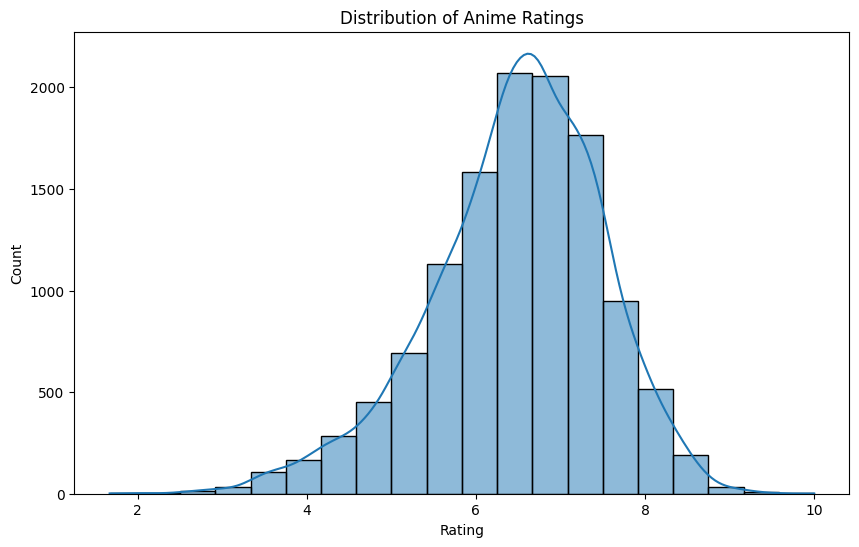

In [26]:
## DISTRIBUTION OF ANIME RATINGS 
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'].dropna(), bins=20 ,kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

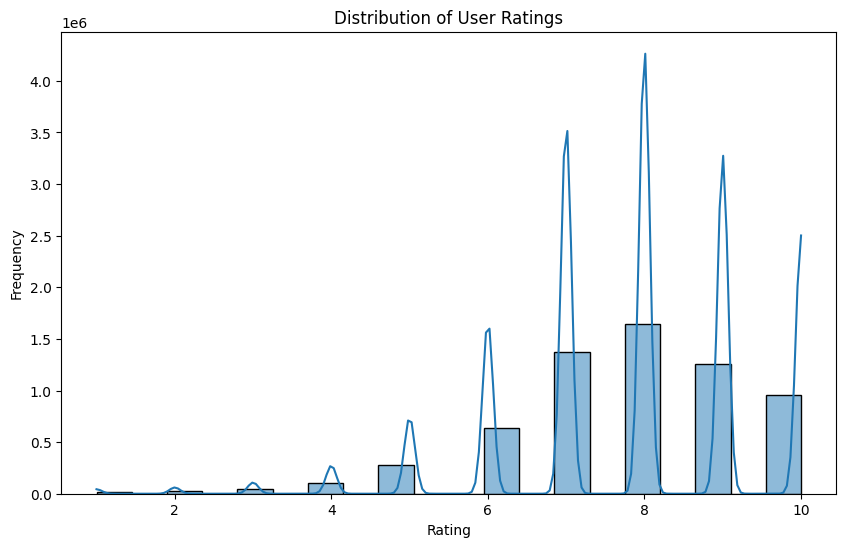

In [27]:
## RATING GIVEN BY USERS 
plt.figure(figsize=(10, 6))
sns.histplot(rating_df['rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Genre Analysis 

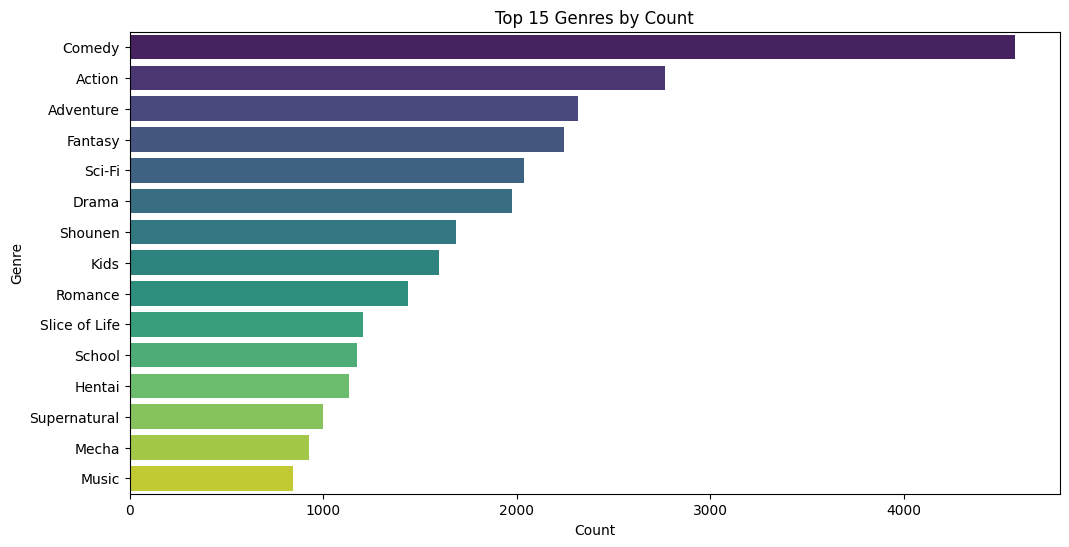

In [28]:
# If genre column is a string with comma-separated genres
from collections import Counter

# Flatten genre counts
genre_counter = Counter()
anime_df['genre'] = anime_df['genre'].fillna('Unknown')
for g in anime_df['genre']:
    for genre in str(g).split(', '):
        genre_counter[genre] += 1

# Plot top genres
top_genres = pd.DataFrame(genre_counter.most_common(15), columns=['Genre', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis',hue='Genre')
plt.title('Top 15 Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### Episode Count Analysis 

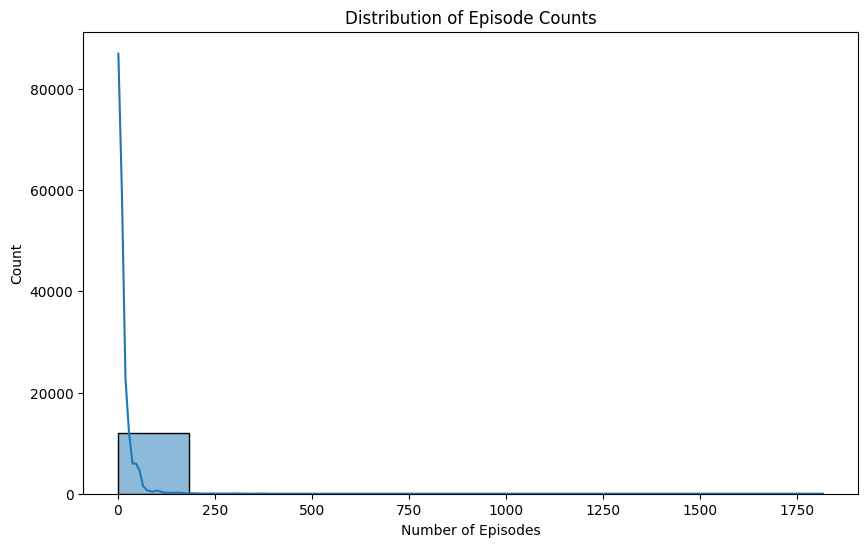

In [29]:

plt.figure(figsize=(10, 6))
sns.histplot(anime_df['episodes'].replace('Unknown',None).dropna(), bins=10,kde='True')
plt.title('Distribution of Episode Counts')
plt.xlabel('Number of Episodes')
plt.ylabel('Count')
plt.show()

### User Activity Patterns 


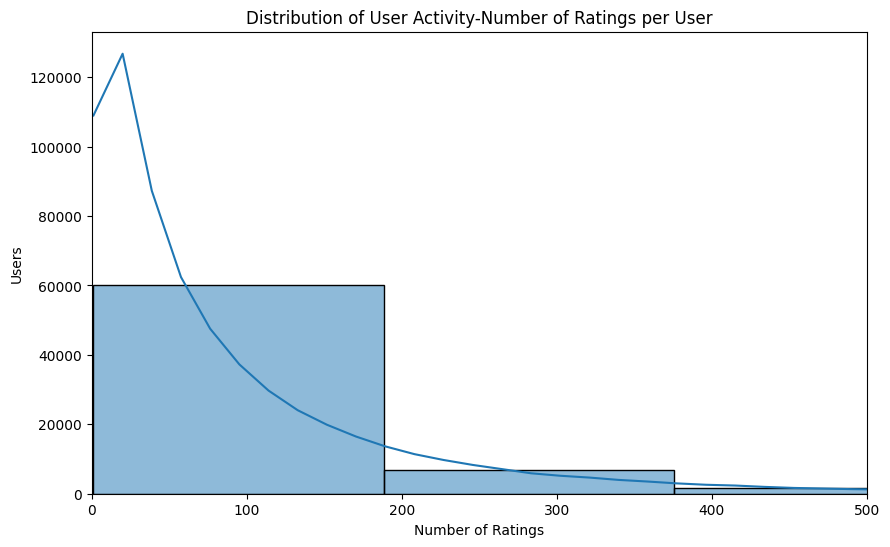

In [30]:
user_activity = rating_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=20, kde=True)
plt.title('Distribution of User Activity-Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Users')
plt.xlim(0,500) #to avoid outliers stretching the x-axis 
plt.show()


### Popular Anime by Rating & Members

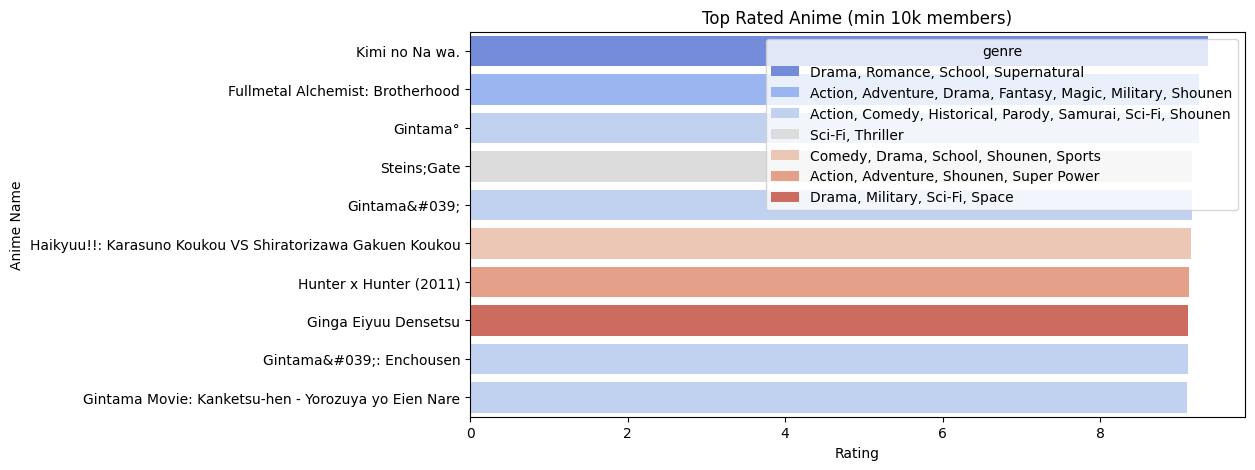

In [31]:
popular_anime = anime_df[anime_df['members'] > 10000].sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=popular_anime, x='rating', y='name', palette='coolwarm',hue='genre')
plt.title("Top Rated Anime (min 10k members)")
plt.xlabel("Rating")
plt.ylabel("Anime Name")
plt.show()

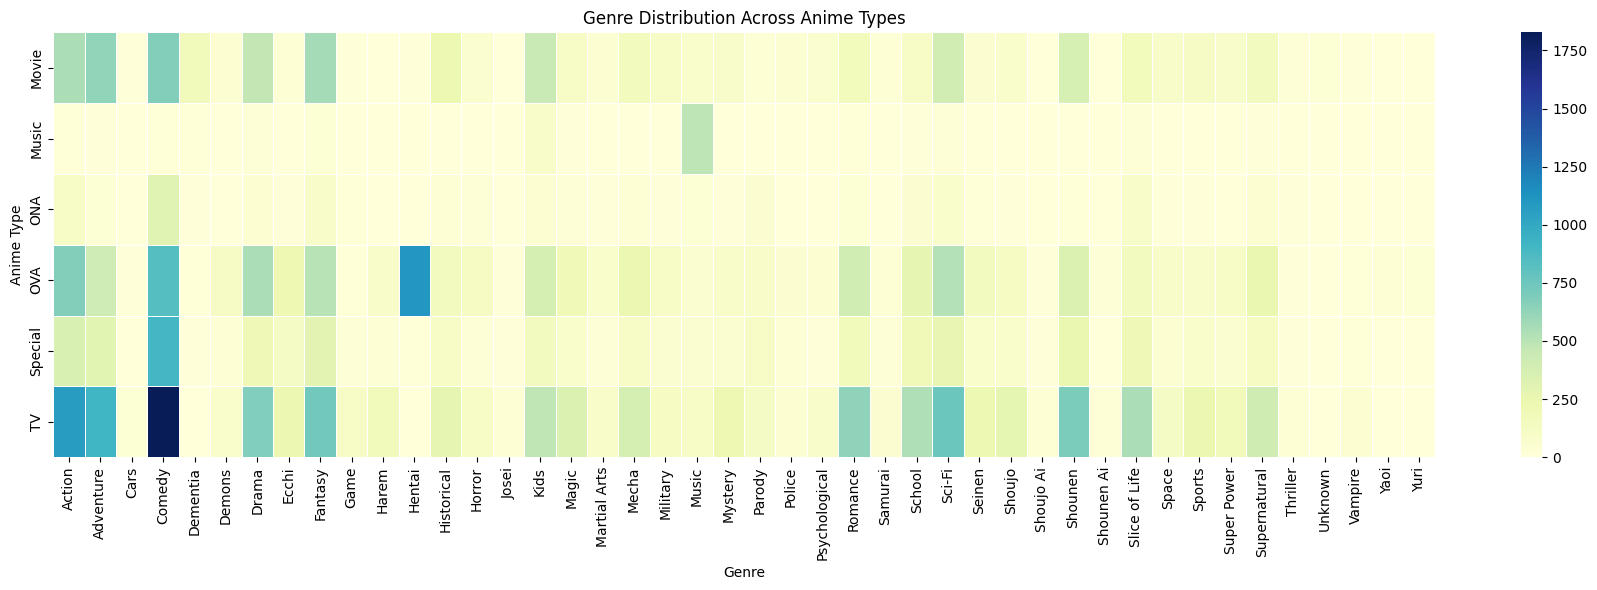

In [32]:
#How genres are distributed across different anime types
# Split genres and explode for counting
genre_type_df = anime_df.copy()
genre_type_df['genre'] = genre_type_df['genre'].fillna('Unknown')
genre_type_df['genre_split'] = genre_type_df['genre'].apply(lambda x: x.split(', '))

# Explode so each row is a (type, genre) pair
exploded = genre_type_df.explode('genre_split')

# Count occurrences
genre_type_counts = exploded.groupby(['type', 'genre_split']).size().reset_index(name='count')

# Pivot for heatmap
genre_type_pivot = genre_type_counts.pivot(index='type', columns='genre_split', values='count').fillna(0)

plt.figure(figsize=(18, 6))
sns.heatmap(genre_type_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Genre Distribution Across Anime Types')
plt.xlabel('Genre')
plt.ylabel('Anime Type')
plt.tight_layout()
plt.show()

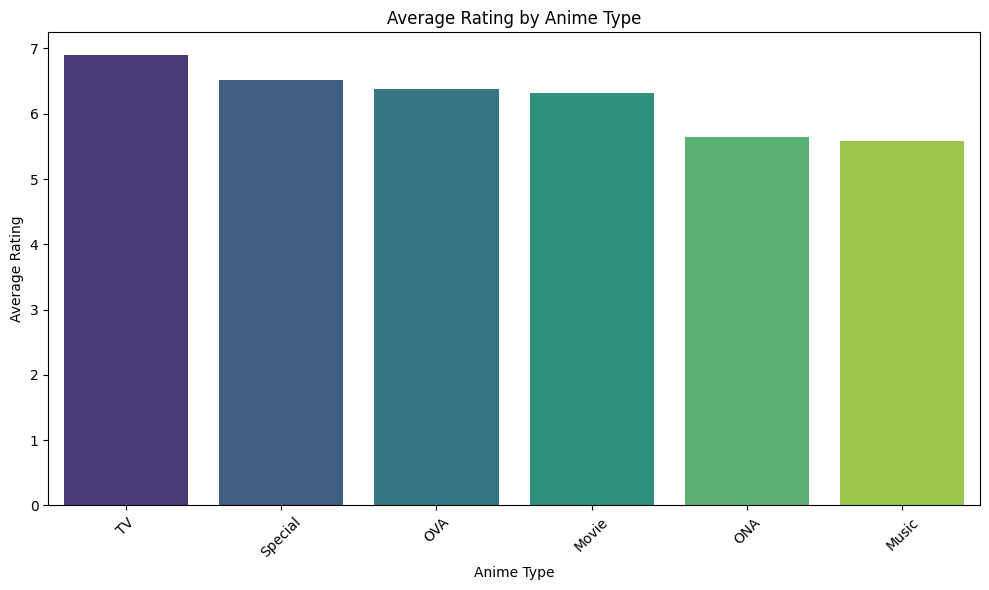

In [33]:
#Avg rating of TV, OVA, Movie, Special, etc bar plot 
avg_rating_by_type = anime_df.groupby('type')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_type, x='type', y='rating', palette='viridis',hue='type',legend=False)

plt.title('Average Rating by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


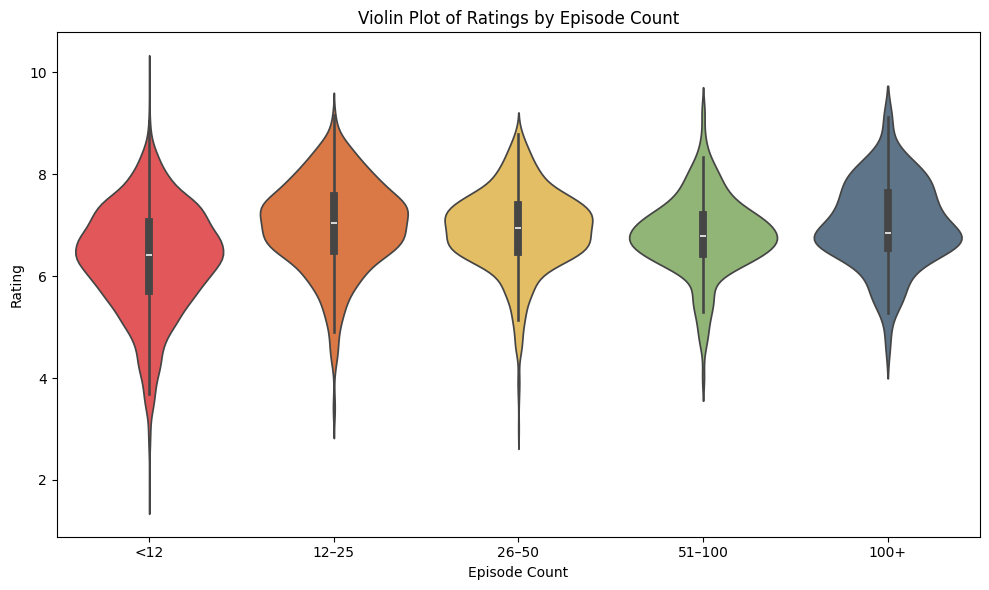

In [34]:
#violin plot OF ratings by episode count
anime_df['episode_bucket'] = pd.cut(anime_df['episodes'], bins=[0, 12, 25, 50, 100, 1000], 
                                     labels=['<12', '12–25', '26–50', '51–100', '100+'])

plt.figure(figsize=(10, 6))
custom_colors = ['#f94144', '#f3722c', '#f9c74f', '#90be6d', '#577590']
sns.violinplot(x='episode_bucket', y='rating', data=anime_df,palette=custom_colors,hue='episode_bucket', legend=False)
plt.title('Violin Plot of Ratings by Episode Count')
plt.xlabel('Episode Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split

In [36]:
anime_df['genre'] = anime_df['genre'].fillna("Unknown")
anime_df['genre_list'] = anime_df['genre'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(anime_df['genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
anime_df = pd.concat([anime_df, genre_df], axis=1)

In [37]:
genre_df.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
anime_df.head()
anime_df.to_csv('data/anime_genre_seperated.csv', index=False)
print("anime_genre_seperated saved as CSV successfully.")

anime_genre_seperated saved as CSV successfully.


In [39]:
user_avg = rating_df.groupby('user_id')['rating'].mean().reset_index(name='avg_rating')


user_watch = rating_df.groupby('user_id').size().reset_index(name='watch_count')

user_genre = rating_df.merge(anime_df[['anime_id'] + list(mlb.classes_)], on='anime_id')
user_genre = user_genre.groupby('user_id')[mlb.classes_].sum().reset_index()

user_profile = user_avg.merge(user_watch, on='user_id').merge(user_genre, on='user_id')

In [40]:
user_profile.head()

,user_id,avg_rating,watch_count,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,10.000000,4,3.0,1.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,10.000000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7.565217,92,62.0,47.0,0.0,38.0,0.0,4.0,31.0,...,5.0,0.0,10.0,9.0,24.0,4.0,0.0,1.0,0.0,0.0
3,5,4.355120,459,154.0,91.0,4.0,321.0,1.0,19.0,78.0,...,73.0,4.0,39.0,41.0,98.0,7.0,0.0,7.0,0.0,0.0
4,7,7.387755,343,126.0,60.0,0.0,198.0,3.0,24.0,48.0,...,51.0,0.0,12.0,33.0,76.0,11.0,0.0,9.0,0.0,0.0


In [41]:
scaler = MinMaxScaler()
user_profiles_scaled = user_profile.copy()
user_profiles_scaled[user_profile.columns[1:]] = scaler.fit_transform(user_profile[user_profile.columns[1:]])

In [42]:
user_profiles_scaled.head()

,user_id,avg_rating,watch_count,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,1.000000,0.000801,0.002342,0.001323,0.000000,0.001406,0.000000,0.015385,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001742,0.000000,0.0,0.000000,0.0,0.0
1,2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000703,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004274,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,3,0.729469,0.024293,0.048400,0.062169,0.000000,0.026723,0.000000,0.030769,0.032091,...,0.010638,0.000000,0.042735,0.040909,0.041812,0.059701,0.0,0.016393,0.0,0.0
3,5,0.372791,0.122264,0.120219,0.120370,0.166667,0.225738,0.009091,0.146154,0.080745,...,0.155319,0.025157,0.166667,0.186364,0.170732,0.104478,0.0,0.114754,0.0,0.0
4,7,0.709751,0.091297,0.098361,0.079365,0.000000,0.139241,0.027273,0.184615,0.049689,...,0.108511,0.000000,0.051282,0.150000,0.132404,0.164179,0.0,0.147541,0.0,0.0


In [43]:
train_df, test_df = train_test_split(user_profiles_scaled, test_size=0.2, random_state=42)

In [44]:
import os

os.makedirs('data/processed', exist_ok=True)


train_df.to_csv('data/processed/user_profiles_train.csv', index=False)
test_df.to_csv('data/processed/user_profiles_test.csv', index=False)

print('✅ User profiles created, scaled, split, and saved for modeling.')


✅ User profiles created, scaled, split, and saved for modeling.


In [48]:
from sklearn.metrics.pairwise import cosine_similarity

# Using genre columns for content similarity
non_genre_cols = ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members', 'genre_list']  # adjust if needed
genre_cols = [col for col in anime_df.columns if col not in non_genre_cols]

print("Using these genre columns for content-based filtering:", genre_cols)

# ✅ Build one-hot encoded content matrix
content_matrix = pd.get_dummies(anime_df[genre_cols], dummy_na=False).fillna(0)


# Compute cosine similarity
content_sim = cosine_similarity(content_matrix)

# Functions to get recommendations

def get_similar_animes(anime_id, top_n=10):
    idx = anime_df[anime_df['anime_id'] == anime_id].index[0]
    sim_scores = list(enumerate(content_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_animes = [int(anime_df.iloc[i[0]]['anime_id']) for i in sim_scores[1:top_n+1]]
    return top_animes

print("Content-based recommendations for anime_id 1:", get_similar_animes(1))

def get_similar_anime_titles(anime_id, top_n=10):
    idx = anime_df[anime_df['anime_id'] == anime_id].index[0]
    sim_scores = list(enumerate(content_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_animes = anime_df.iloc[[i[0] for i in sim_scores[1:top_n+1]]][['anime_id', 'name']]
    return top_animes

print(get_similar_anime_titles(1))


Using these genre columns for content-based filtering: ['episode_bucket', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'Yuri']
Content-based recommendations for anime_id 1: [1490, 1000, 1650, 209, 1651, 4037, 1184, 2451, 2331, 5307]
      anime_id                             name
2333    1490.0        Ginga Tetsudou Monogatari
741     1000.0    Uchuu Kaizoku Captain Harlock
1004    1650.0              Uchuu Senkan Yamato
1192     209.0                     R.O.D the TV
1218    1651.0            Uchuu Senkan Yamato 2
1465    4037.0  Cowboy Bebop: Yose Atsume Blues
3026

In [49]:

from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error



# 2️⃣ Encode for matrix indexing
user_codes = rating_df['user_id'].astype('category').cat.codes
anime_codes = rating_df['anime_id'].astype('category').cat.codes

n_users = user_codes.nunique()
n_anime = anime_codes.nunique()

# 3️⃣ Create sparse user-item matrix
rating_matrix = csr_matrix((rating_df['rating'], (user_codes, anime_codes)), shape=(n_users, n_anime))

# 4️⃣ TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
matrix_reduced = svd.fit_transform(rating_matrix)  # (n_users, 50)

# 5️⃣ Memory-safe RMSE calculation in batches
batch_size = 100_000
num_ratings = len(rating_df)

pred_ratings_list = []

item_embeddings_all = svd.components_.T  # shape: (n_anime, 50)

for start in range(0, num_ratings, batch_size):
    end = min(start + batch_size, num_ratings)
    rows_batch = user_codes.iloc[start:end].to_numpy()
    cols_batch = anime_codes.iloc[start:end].to_numpy()
    
    user_batch = matrix_reduced[rows_batch]          # (batch_size, 50)
    item_batch = item_embeddings_all[cols_batch]     # (batch_size, 50)
    
    pred_batch = np.sum(user_batch * item_batch, axis=1)
    pred_ratings_list.append(pred_batch)

pred_ratings = np.concatenate(pred_ratings_list)
true_ratings = rating_df['rating'].to_numpy()

rmse = mean_squared_error(true_ratings, pred_ratings) ** 0.5
print(f"Collaborative Filtering RMSE (TruncatedSVD, batch-safe): {rmse:.4f}")

# 6️⃣ Top-N recommendations for a specific user
user_id_actual = 1
user_idx = rating_df.loc[rating_df['user_id'] == user_id_actual, 'user_id'].astype('category').cat.codes.iloc[0]

user_embedding = matrix_reduced[user_idx]             # (50,)
predicted_ratings = item_embeddings_all @ user_embedding  # (n_anime,)

# Mask already rated items
rated_items = rating_matrix[user_idx].nonzero()[1]
predicted_ratings[rated_items] = -np.inf

top_n = 10
top_indices = np.argsort(predicted_ratings)[-top_n:][::-1]

anime_id_lookup = pd.Series(rating_df['anime_id'].astype('category').cat.categories)
recommended_anime_ids = anime_id_lookup.iloc[top_indices].tolist()

print(f"Top {top_n} recommended anime IDs for user_id {user_id_actual}: {recommended_anime_ids}")

# Map recommended_anime_ids to names
recommended_anime_names = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)][['anime_id', 'name']]

# Preserve recommendation order:
recommended_anime_names_ordered = recommended_anime_names.set_index('anime_id').loc[recommended_anime_ids].reset_index()

print(f"\nTop {top_n} recommended anime for user_id {user_id_actual}:")
print(recommended_anime_names_ordered)


Collaborative Filtering RMSE (TruncatedSVD, batch-safe): 5.2280
Top 10 recommended anime IDs for user_id 1: [16498, 10620, 21881, 6547, 2993, 4214, 19815, 6702, 10793, 11759]

Top 10 recommended anime for user_id 1:
   anime_id                      name
0   16498.0        Shingeki no Kyojin
1   10620.0          Mirai Nikki (TV)
2   21881.0       Sword Art Online II
3    6547.0              Angel Beats!
4    2993.0        Rosario to Vampire
5    4214.0  Rosario to Vampire Capu2
6   19815.0           No Game No Life
7    6702.0                Fairy Tail
8   10793.0              Guilty Crown
9   11759.0               Accel World


Train shape: (6267640, 4), Test shape: (69600, 4)

✅ Collaborative Filtering RMSE on Test Set: 6.8574

✅ Average Precision@10: 0.0500
✅ Average Recall@10: 0.5000


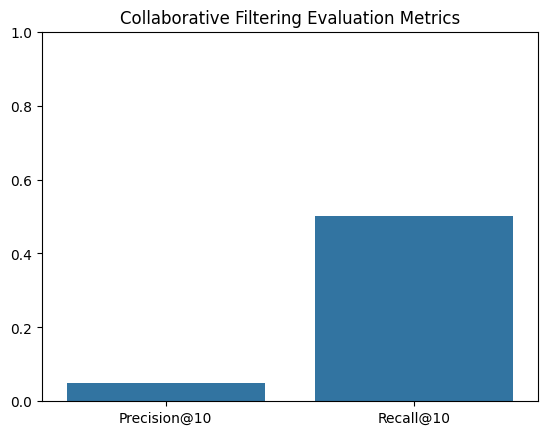


✅ Recommendations saved as 'recommendations_user_1.csv' for Power BI visualization.

✅ TruncatedSVD model saved as 'models/truncated_svd_model.joblib'.


In [50]:
# --- 📦 Imports ---
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# --- 1️⃣ Prepare Train-Test Split ---
# Leave-1-out split per user (each user: last rating in test, rest in train)

rating_df_sorted = rating_df.sort_values(['user_id', 'timestamp']) if 'timestamp' in rating_df.columns else rating_df.sort_values(['user_id'])
rating_df['rank_latest'] = rating_df_sorted.groupby('user_id').cumcount(ascending=False) + 1

test_df = rating_df[rating_df['rank_latest'] == 1]
train_df = rating_df[rating_df['rank_latest'] > 1].copy()

print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")

# --- 2️⃣ Encode for matrix indexing ---
user_cats = pd.Categorical(train_df['user_id'])
anime_cats = pd.Categorical(train_df['anime_id'])

train_df.loc[:, 'user_code'] = user_cats.codes
train_df.loc[:, 'anime_code'] = anime_cats.codes

n_users = user_cats.categories.size
n_anime = anime_cats.categories.size

# --- 3️⃣ Create User-Item Matrix ---
rating_matrix = csr_matrix((train_df['rating'], (train_df['user_code'], train_df['anime_code'])),
                           shape=(n_users, n_anime))

# --- 4️⃣ TruncatedSVD Collaborative Filtering ---
svd = TruncatedSVD(n_components=50, random_state=42)
matrix_reduced = svd.fit_transform(rating_matrix)
item_embeddings_all = svd.components_.T

# --- 5️⃣ RMSE Evaluation on Test Set ---
test_users = pd.Categorical(test_df['user_id'], categories=user_cats.categories)
test_animes = pd.Categorical(test_df['anime_id'], categories=anime_cats.categories)

valid_mask = (~pd.isna(test_users.codes)) & (~pd.isna(test_animes.codes))
filtered_test_df = test_df[valid_mask]

user_codes_test = filtered_test_df['user_id'].astype('category').cat.set_categories(user_cats.categories).cat.codes.to_numpy()
anime_codes_test = filtered_test_df['anime_id'].astype('category').cat.set_categories(anime_cats.categories).cat.codes.to_numpy()

user_embeddings_test = matrix_reduced[user_codes_test]
item_embeddings_test = item_embeddings_all[anime_codes_test]

pred_ratings = np.sum(user_embeddings_test * item_embeddings_test, axis=1)
true_ratings = filtered_test_df['rating'].to_numpy()

rmse = mean_squared_error(true_ratings, pred_ratings) ** 0.5
print(f"\n✅ Collaborative Filtering RMSE on Test Set: {rmse:.4f}")
# --- 6️⃣ Precision@K and Recall@K Evaluation ---

def precision_recall_at_k(user_code, k=10):
    user_embedding = matrix_reduced[user_code]
    predicted_ratings = item_embeddings_all @ user_embedding

    # Get test items for this user
    test_items = filtered_test_df.loc[user_codes_test == user_code, 'anime_id']
    test_items_codes = pd.Categorical(test_items, categories=anime_cats.categories).codes
    true_items = set(test_items_codes[test_items_codes >= 0])

    if len(true_items) == 0:
        return np.nan, np.nan

    # Mask training rated items
    rated_items = rating_matrix[user_code].nonzero()[1]
    predicted_ratings[rated_items] = -np.inf

    top_k_indices = np.argsort(predicted_ratings)[-k:][::-1]
    recommended_items = set(top_k_indices)

    hits = recommended_items & true_items
    precision = len(hits) / k
    recall = len(hits) / len(true_items) if len(true_items) > 0 else 0

    return precision, recall

sample_user_codes = np.random.choice(train_df['user_code'].unique(), size=min(10, len(train_df['user_code'].unique())), replace=False)

precisions, recalls = [], []
for user_code in sample_user_codes:
    p, r = precision_recall_at_k(user_code, k=10)
    if not np.isnan(p):
        precisions.append(p)
        recalls.append(r)

avg_precision = np.nanmean(precisions)
avg_recall = np.nanmean(recalls)

print(f"\n✅ Average Precision@10: {avg_precision:.4f}")
print(f"✅ Average Recall@10: {avg_recall:.4f}")

# --- 7️⃣ Visualization ---
sns.barplot(x=['Precision@10', 'Recall@10'], y=[avg_precision, avg_recall])
plt.title('Collaborative Filtering Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

# --- 8️⃣ Save Recommendations for Power BI ---
def recommend_for_user(user_id_actual, top_n=10):
    if user_id_actual not in user_cats.categories:
        print(f"User {user_id_actual} not in training data.")
        return pd.DataFrame()
    user_code = user_cats.categories.get_loc(user_id_actual)
    user_embedding = matrix_reduced[user_code]
    predicted_ratings = item_embeddings_all @ user_embedding

    rated_items = rating_matrix[user_code].nonzero()[1]
    predicted_ratings[rated_items] = -np.inf

    top_indices = np.argsort(predicted_ratings)[-top_n:][::-1]
    anime_id_lookup = pd.Series(anime_cats.categories)
    recommended_anime_ids = anime_id_lookup.iloc[top_indices].tolist()

    recommended_anime_names = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)][['anime_id', 'name']]
    recommended_anime_names_ordered = recommended_anime_names.set_index('anime_id').loc[recommended_anime_ids].reset_index()

    recommended_anime_names_ordered['user_id'] = user_id_actual
    return recommended_anime_names_ordered

recommendations_df = recommend_for_user(user_id_actual=1, top_n=10)
recommendations_df.to_csv('recommendations_user_1.csv', index=False)

print("\n✅ Recommendations saved as 'recommendations_user_1.csv' for Power BI visualization.")

# --- 9️⃣ Save Model ---
import os
os.makedirs('models', exist_ok=True)
joblib.dump(svd, 'models/truncated_svd_model.joblib')
print("\n✅ TruncatedSVD model saved as 'models/truncated_svd_model.joblib'.")


In [51]:
# --- 7️⃣ Save Evaluation Metrics for Power BI ---
metrics = {
    'RMSE': rmse,
    'Precision@10': avg_precision,
    'Recall@10': avg_recall
}

# Convert to DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['metric', 'value'])

# Save as CSV for Power BI
metrics_df.to_csv('data/model_metrics.csv', index=False)

print("✅ Saved 'data/model_metrics.csv' for Power BI dashboard integration.")


✅ Saved 'data/model_metrics.csv' for Power BI dashboard integration.


In [52]:
num_users = rating_df['user_id'].nunique()
print("Number of unique users:", num_users)


Number of unique users: 69600


In [53]:
import pandas as pd
import numpy as np

# ✅ Create consistent user_id to row index mapping used during matrix creation
user_cats = pd.Categorical(rating_df['user_id'])
anime_cats = pd.Categorical(rating_df['anime_id'])

user_id_to_code = {user_id: code for user_id, code in zip(user_cats.categories, range(len(user_cats.categories)))}

# --- Recommendation function ---
def recommend_for_user(user_id_actual, top_n=10):
    # Safely get user_idx
    user_idx = user_id_to_code.get(user_id_actual, None)
    if user_idx is None or user_idx >= matrix_reduced.shape[0]:
        return pd.DataFrame()  # skip users not in training data

    user_embedding = matrix_reduced[user_idx]
    predicted_ratings = item_embeddings_all @ user_embedding

    rated_items = rating_matrix[user_idx].nonzero()[1]
    predicted_ratings[rated_items] = -np.inf

    top_indices = np.argsort(predicted_ratings)[-top_n:][::-1]
    anime_id_lookup = pd.Series(anime_cats.categories)
    recommended_anime_ids = anime_id_lookup.iloc[top_indices].tolist()

    recommended_anime_names = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)][['anime_id', 'name', 'genre']]
    recommended_anime_names_ordered = recommended_anime_names.set_index('anime_id').loc[recommended_anime_ids].reset_index()
    recommended_anime_names_ordered['user_id'] = user_id_actual

    return recommended_anime_names_ordered

# --- Generate for 100 users ---
sample_users = pd.Series(rating_df['user_id'].unique()).sample(100, random_state=42).tolist()

all_recommendations = []
for uid in sample_users:
    recs = recommend_for_user(uid, top_n=10)
    if not recs.empty:
        all_recommendations.append(recs)

all_recommendations_df = pd.concat(all_recommendations, ignore_index=True)
all_recommendations_df.to_csv('data/recommendations_for_powerbi.csv', index=False)

print("✅ Recommendations for 100 users saved for Power BI.")
print(all_recommendations_df.head())


✅ Recommendations for 100 users saved for Power BI.
   anime_id                     name  \
0    3588.0               Soul Eater   
1    4896.0  Umineko no Naku Koro ni   
2    3457.0           Vampire Knight   
3    7724.0                    Shiki   
4    4752.0    Vampire Knight Guilty   

                                               genre  user_id  
0  Action, Adventure, Comedy, Fantasy, Shounen, S...    15190  
1       Horror, Mystery, Psychological, Supernatural    15190  
2  Drama, Mystery, Romance, Shoujo, Supernatural,...    15190  
3           Mystery, Supernatural, Thriller, Vampire    15190  
4  Drama, Mystery, Romance, Shoujo, Supernatural,...    15190  


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# --- Encode for matrix indexing ---
user_codes = rating_df['user_id'].astype('category').cat.codes
anime_codes = rating_df['anime_id'].astype('category').cat.codes

n_users = user_codes.nunique()
n_anime = anime_codes.nunique()

# --- Create sparse user-item matrix ---
rating_matrix = csr_matrix((rating_df['rating'], (user_codes, anime_codes)), shape=(n_users, n_anime))

# --- Train Truncated SVD (or load your trained model) ---
svd = TruncatedSVD(n_components=50, random_state=42)
matrix_reduced = svd.fit_transform(rating_matrix)      # (n_users, 50)
item_embeddings_all = svd.components_.T               # (n_anime, 50)

# --- Generate recommendations for all users and count frequencies ---
recommendation_counts = np.zeros(n_anime, dtype=int)

top_n = 10

for user_idx in range(n_users):
    user_embedding = matrix_reduced[user_idx]
    predicted_ratings = item_embeddings_all @ user_embedding

    rated_items = rating_matrix[user_idx].nonzero()[1]
    predicted_ratings[rated_items] = -np.inf

    top_indices = np.argsort(predicted_ratings)[-top_n:]
    recommendation_counts[top_indices] += 1

# --- Map back to anime_id and names ---
anime_id_lookup = pd.Series(rating_df['anime_id'].astype('category').cat.categories)
recommended_anime_ids = anime_id_lookup.iloc[np.arange(n_anime)].values

anime_names_lookup = anime_df.set_index('anime_id')['name'].reindex(recommended_anime_ids).values

# --- Create DataFrame ---
recommendation_freq_df = pd.DataFrame({
    'anime_id': recommended_anime_ids,
    'anime_name': anime_names_lookup,
    'recommendation_count': recommendation_counts
})

# Remove entries with zero recommendations for cleaner visualization
recommendation_freq_df = recommendation_freq_df[recommendation_freq_df['recommendation_count'] > 0]

# --- Save to CSV ---
recommendation_freq_df.to_csv('data/recommendation_frequency.csv', index=False)

print("\n✅ Recommendation frequency CSV saved as 'data/recommendation_frequency.csv' for Power BI visualization.")
